In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


df = pd.read_csv("Life_Expectancy.csv") 


In [111]:
print(df.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [112]:
print(df.shape)

(2938, 22)


In [113]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [114]:
print(df.dtypes)

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [116]:
print(df.describe())

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

In [117]:
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [118]:
print(df.skew(numeric_only=True))

Year                               -0.006409
Life expectancy                    -0.638605
Adult Mortality                     1.174369
infant deaths                       9.786963
Alcohol                             0.589563
percentage expenditure              4.652051
Hepatitis B                        -1.930845
Measles                             9.441332
 BMI                               -0.219312
under-five deaths                   9.495065
Polio                              -2.098053
Total expenditure                   0.618686
Diphtheria                         -2.072753
 HIV/AIDS                           5.396112
GDP                                 3.206655
Population                         15.916236
 thinness  1-19 years               1.711471
 thinness 5-9 years                 1.777424
Income composition of resources    -1.143763
Schooling                          -0.602437
dtype: float64


In [119]:
df.columns = df.columns.str.strip()  # Removes all leading/trailing spaces

df["Life expectancy"] = df["Life expectancy"].fillna(df["Life expectancy"].median)
df["Adult Mortality"]  = df["Adult Mortality"].fillna(df["Adult Mortality"].median)
df["Alcohol"]  = df["Alcohol"].fillna(0)
df["Hepatitis B"] = df["Hepatitis B"].fillna(0)
df["BMI"] = df["BMI"].fillna(df["BMI"].median)
df["Polio"] = df["Polio"].fillna(df["Polio"].median)
df["Total expenditure"] = df["Total expenditure"].fillna(df["Total expenditure"].mean)
df["Diphtheria"]= df["Diphtheria"].fillna(0)
df["GDP"] = df["GDP"].fillna(df["GDP"].median)
df["Population"] = df["Population"].fillna(df["Population"].median)
df["thinness  1-19 years"] = df["thinness  1-19 years"].fillna(df["thinness  1-19 years"].median)
df["thinness 5-9 years"] = df["thinness 5-9 years"].fillna(df["thinness 5-9 years"].median)
df["Income composition of resources"] = df["Income composition of resources"].fillna(df["Income composition of resources"].median)
df["Schooling"] = df["Schooling"].fillna(df["Schooling"].median)
df.columns = df.columns.str.replace(" ", "_")

print(df.isnull().sum())



Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64


In [120]:
print(df.duplicated().sum())

0


In [121]:
df["Status"] = df["Status"].map({"Developing": 0, "Developed": 1})


In [122]:
print(df.head())

       Country  Year  Status Life_expectancy Adult_Mortality  infant_deaths  \
0  Afghanistan  2015       0            65.0           263.0             62   
1  Afghanistan  2014       0            59.9           271.0             64   
2  Afghanistan  2013       0            59.9           268.0             66   
3  Afghanistan  2012       0            59.5           272.0             69   
4  Afghanistan  2011       0            59.2           275.0             71   

   Alcohol  percentage_expenditure  Hepatitis_B  Measles  ... Polio  \
0     0.01               71.279624         65.0     1154  ...   6.0   
1     0.01               73.523582         62.0      492  ...  58.0   
2     0.01               73.219243         64.0      430  ...  62.0   
3     0.01               78.184215         67.0     2787  ...  67.0   
4     0.01                7.097109         68.0     3013  ...  68.0   

   Total_expenditure Diphtheria HIV/AIDS         GDP  Population  \
0               8.16       65.

In [124]:
df.columns = df.columns.str.strip()
print(df["Life_expectancy"].nunique())


363


In [ ]:
print(df["Country"].nunique())


193


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df["Life expectancy"] = pd.to_numeric(df["Life expectancy"], errors='coerce')
df["GDP"] = pd.to_numeric(df["GDP"], errors='coerce')
df["Schooling"] = pd.to_numeric(df["Schooling"], errors='coerce')


In [ ]:
print(df.dtypes[["Life expectancy", "HIV/AIDS", "GDP", "Schooling", "infant deaths"]])


Life expectancy    float64
HIV/AIDS           float64
GDP                float64
Schooling           object
infant deaths        int64
dtype: object


In [ ]:
df.groupby("Country")[["GDP", "Life expectancy"]].mean()


,GDP,Life expectancy
Country,,
Afghanistan,340.015425,58.19375
Albania,2119.726679,75.15625
Algeria,2847.853392,73.61875
Angola,1975.143045,49.01875
Antigua and Barbuda,9759.305728,75.05625
...,...,...
Venezuela (Bolivarian Republic of),NaN,73.38750
Viet Nam,NaN,74.77500
Yemen,NaN,63.86250


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_cols)


Index(['Year', 'Status', 'Life expectancy', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'under-five deaths',
       'Diphtheria', 'HIV/AIDS', 'GDP'],
      dtype='object')


In [ ]:
if 'Status' in df.columns:
    df = df.drop(columns=['Status'])
else:
    print("Column 'Status' does not exist.")



Column 'Status' does not exist.


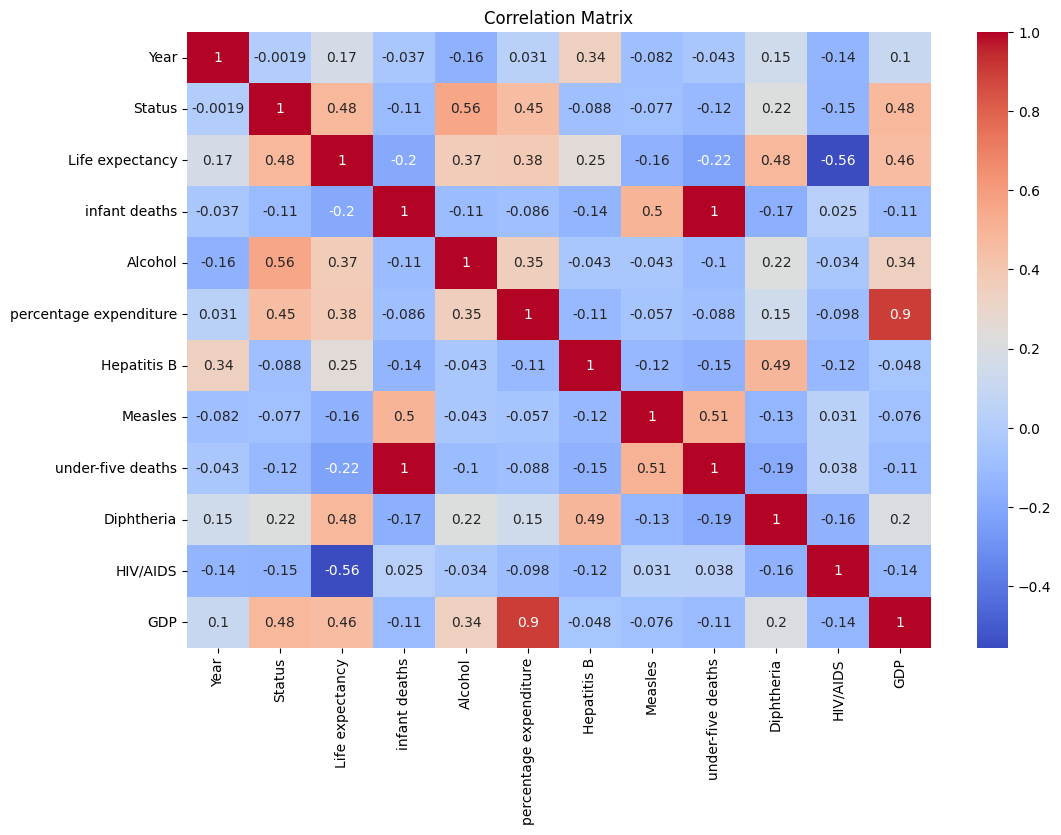

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
corr = df.corr(numeric_only=True)["Life expectancy"].sort_values()
print(corr)


HIV/AIDS                 -0.556556
under-five deaths        -0.222529
infant deaths            -0.196557
Measles                  -0.157586
Year                      0.170033
Hepatitis B               0.246817
Alcohol                   0.370413
percentage expenditure    0.381864
GDP                       0.461455
Diphtheria                0.480075
Status                    0.482136
Life expectancy           1.000000
Name: Life expectancy, dtype: float64


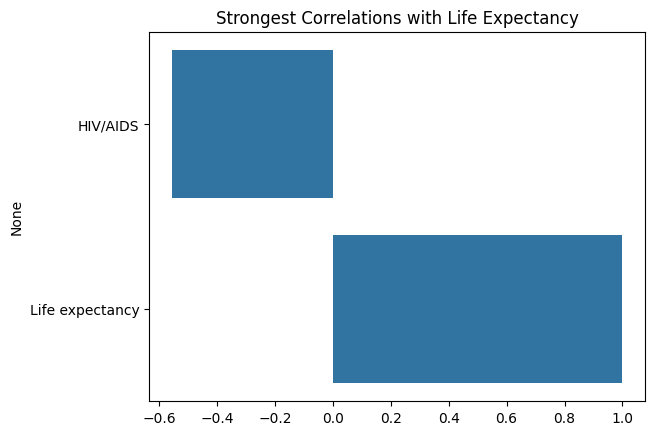

In [ ]:

top_corr = corr[abs(corr) > 0.5].dropna()  # threshold can be adjusted
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Strongest Correlations with Life Expectancy")
plt.show()


In [ ]:
country_summary = df.groupby("Country")[["Life expectancy", "HIV/AIDS", "GDP", "Schooling", "infant deaths"]].mean().sort_values("Life expectancy", ascending=False)
print(country_summary)

                       Life expectancy  HIV/AIDS           GDP  Schooling  \
Country                                                                     
Japan                         82.53750       0.1  24892.544784   14.97500   
Sweden                        82.51875       0.1  29334.990639   15.86875   
Iceland                       82.44375       0.1  30159.502907   18.15625   
Switzerland                   82.33125       0.1  57362.874601   15.39375   
France                        82.21875       0.1  26465.551381   15.90000   
...                                ...       ...           ...        ...   
Niue                               NaN       0.1           NaN        NaN   
Palau                              NaN       0.1   1932.122370   14.20000   
Saint Kitts and Nevis              NaN       0.1           NaN   13.40000   
San Marino                         NaN       0.1           NaN   15.10000   
Tuvalu                             NaN       0.1   3542.135890    0.00000   

In [ ]:
print(df.groupby("Country")[["Life expectancy", "GDP", "Schooling", "HIV/AIDS"]].mean())


                                    Life expectancy          GDP  Schooling  \
Country                                                                       
Afghanistan                                58.19375   340.015425    8.21250   
Albania                                    75.15625  2119.726679   12.13750   
Algeria                                    73.61875  2847.853392   12.71250   
Angola                                     49.01875  1975.143045    8.04375   
Antigua and Barbuda                        75.05625  9759.305728    8.84375   
...                                             ...          ...        ...   
Venezuela (Bolivarian Republic of)         73.38750          NaN   12.78750   
Viet Nam                                   74.77500          NaN   11.51250   
Yemen                                      63.86250          NaN    8.50625   
Zambia                                     53.90625   811.811841   11.21250   
Zimbabwe                                   50.48750 

In [ ]:
print(df.groupby("Status")[["Life expectancy", "GDP", "Schooling"]].mean()
)

        Life expectancy           GDP  Schooling
Status                                          
0             67.111465   4286.556053  11.219256
1             79.197852  22053.386446  15.845474


[]

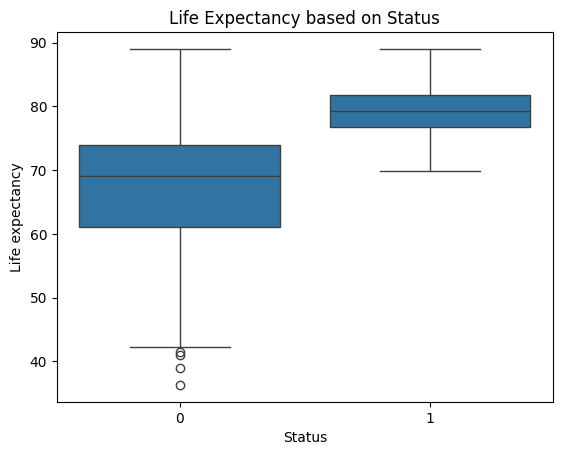

In [ ]:
sns.boxplot(data=df,x="Status",y="Life expectancy")
plt.title("Life Expectancy based on Status")
plt.plot()

[]

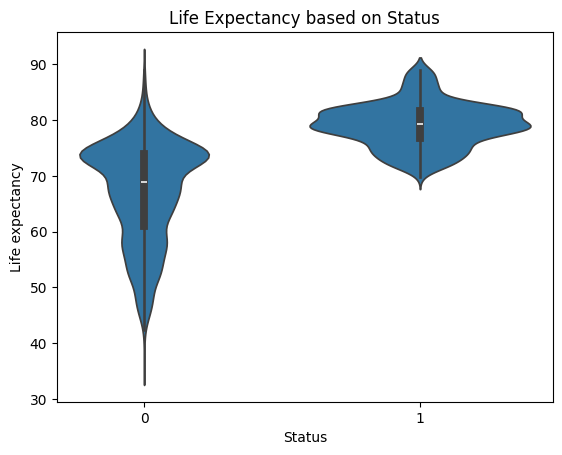

In [ ]:
sns.violinplot(data=df,x="Status",y="Life expectancy")
plt.title("Life Expectancy based on Status")
plt.plot()

In [ ]:
df["Population"] = pd.to_numeric(df["Population"], errors="coerce")
df["under-five deaths"] = pd.to_numeric(df["under-five deaths"], errors="coerce")

df["Under5_ratio"] = df["under-five deaths"] / df["Population"] * 1000


In [ ]:
country_summary = df.groupby("Country")[["Life expectancy", "HIV/AIDS", "GDP", "Schooling"]].mean().sort_values("Life expectancy", ascending=False)
status_summary = df.groupby("Status")[["Life expectancy", "HIV/AIDS", "GDP", "Schooling"]].mean()



<Axes: xlabel='Status', ylabel='Life expectancy'>

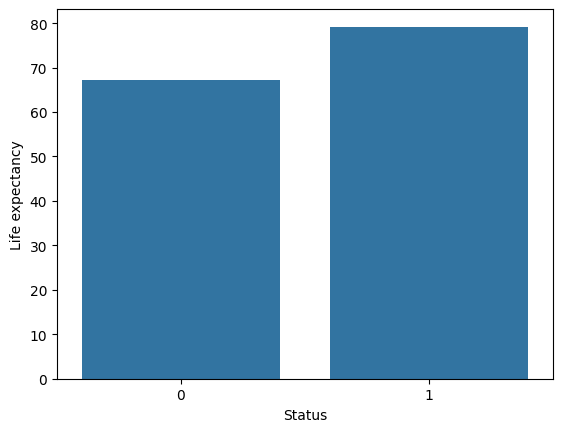

In [ ]:

sns.barplot(x=status_summary.index, y=status_summary["Life expectancy"])


<Axes: xlabel='Status', ylabel='Life expectancy'>

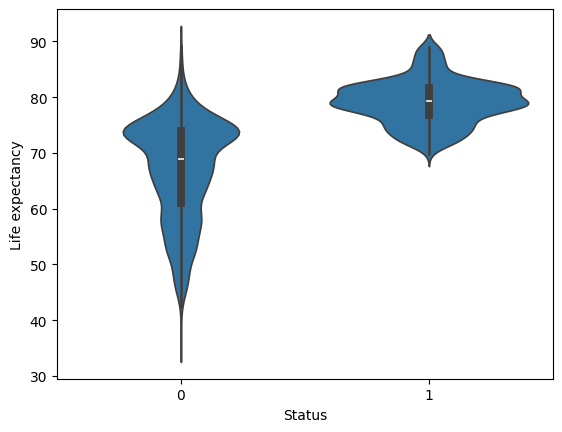

In [ ]:
sns.violinplot(x="Status", y="Life expectancy", data=df)



<Axes: xlabel='Status', ylabel='GDP'>

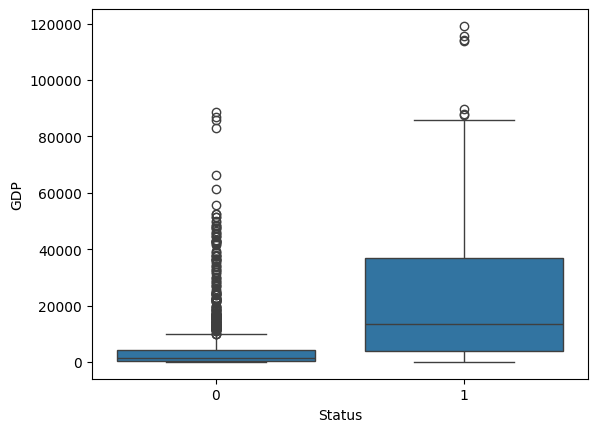

In [ ]:
sns.boxplot(x="Status", y="GDP", data=df)

In [ ]:
df.to_csv("cleaned_life_expectancy.csv", index=False)


**Modeling**

In [ ]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.47,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.34834,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df= pd.read_csv("cleaned_life_expectancy.csv")

In [ ]:
y = df["Life expectancy"]
X = df.drop(columns=["Life expectancy", "Country", "Year"])  # Drop target + non-predictive columns

In [126]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 2938, dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit on training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [ ]:
# Fill missing values in y_train with the median
y_train_filled = y_train.fillna(y_train.median())

model = LinearRegression()
model.fit(X_train, y_train_filled)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [137]:
import numpy as np

# Check NaNs in X_train
print("NaNs in X_train:", np.isnan(X_train).sum())

# Check NaNs in y_train
print("NaNs in y_train:", np.isnan(y_train).sum())

# Check Infs in X_train
print("Infs in X_train:", np.isinf(X_train).sum())

# Check Infs in y_train
print("Infs in y_train:", np.isinf(y_train).sum())


NaNs in X_train: 0
NaNs in y_train: 0
Infs in X_train: 0
Infs in y_train: 0


In [136]:

y_train = y_train.fillna(y_train.median())


In [133]:

model= LinearRegression()
model.fit(X_train,y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:


print(X_train.dtypes)
print(y_train.dtypes)
print(X_train.head())
print(y_train.head())

Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object
float64
      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
456             126.0              0     5.28              345.463714   
462             152.0              0     3.81             

In [143]:

y_test = y_test.fillna(y_test.mode()[0])


In [151]:
y_pred_class = (y_pred > 0.5).astype(int)  # For binary classification


In [157]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate regression model
mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 15.325787732135668
Mean Absolute Error (MAE): 2.8608434326782866
R-squared (R²): 0.8231730899798554
